# Dataset Preprocessing
### Outline of Preprocessing Steps
- Discover and Visualize
	- Inspect
	- Histogram
	- Look for Correlations
	- Boxplot
- Experimenting with Attribute Combinations
- Prepare for Machine Learning Algorithms:
	- Handle Outliers
	- Feature Engineering (New Features)
	- Categorical Encoding
	- Feature Scaling
	- Correlation & Multicollinearity Check
	- Dimensionality Reduction (PCA, RFE)
	- Handling Imbalanced Data
	- Final Feature & Target Split
	- Train-Test Split

#### Discover and Visualize

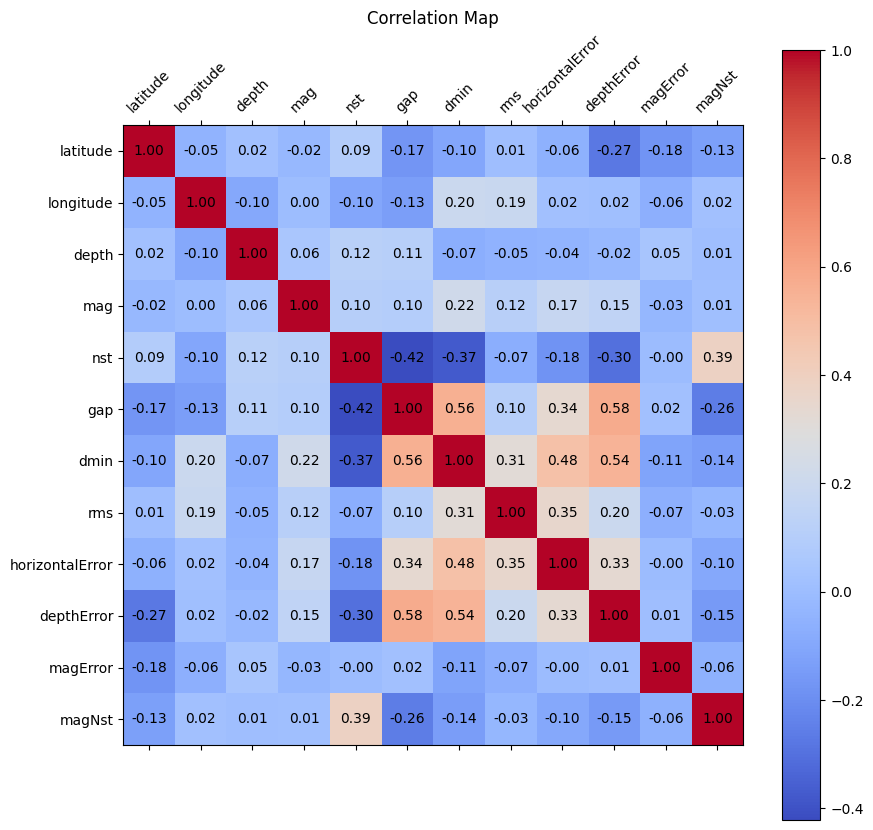

In [ ]:
import pandas
import matplotlib.pyplot as plot

# Load dataset
data = pandas.read_csv("all-raw-dataset.csv")

### Inspect dataset
inspect = False

if inspect:
	print( "Total missing values per column/feature:", data.isnull().sum() )

### Visualize dataset
histrogram = False
correlation = True
boxplot = False

# Histogram
if histrogram:
	data.hist( bins = 20, figsize = (20, 15) )
	plot.suptitle( "\nHistograms of Numerical Features:" )

# Correlation Matrix
if correlation:
	corr_matrix = data.corr( numeric_only = True )

	fig, ax = plot.subplots( figsize=(10, 10) )
	cax = ax.matshow( corr_matrix, cmap = "coolwarm" )
	fig.colorbar( cax )

	plot.xticks( range( len( corr_matrix.columns )), corr_matrix.columns, rotation = 45 )
	plot.yticks( range( len( corr_matrix.columns )), corr_matrix.columns )
	for i in range( len( corr_matrix.columns )):
		for j in range( len( corr_matrix.columns )):
			ax.text( j, i, f"{corr_matrix.iloc[ i, j ]:.2f}", va = "center", ha = "center" )
	plot.title( "Correlation Map" )
	plot.show()

# Box plot
if boxplot:
	numeric_cols = list(data.select_dtypes( include = ['int64', 'float64'] ).columns)

	plot.figure( figsize = (10, 10) )
	data.boxplot( column = numeric_cols, vert = True )
	plot.title( "Boxplot of Numerical Features" )
	plot.show()

#### Insights from correlation map:
- gap, nest, and dmin are strongly correlated. More stations (nst) reduce gap and are closer to the event (lower dmin)
- Fewer stations = higher gap and higher distance
- depthError, horizontalError, gap, and dmin are moderately correlated. Poorly covered or distant events lead to higher errors in location and depth.
- mag does not strongly correlate with other features. Magnitude is independent of these parameters, which is scientifically valid since magnitude depends on energy released, not the event's location and geometry.
- Latitude and longtitude have very low correlation with other features.

#### Prepare the Data for Machine Learning